In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

In [2]:
start_time  = time.time()
#initialize vectors 
N = 1000
h=1

In [3]:
##============intialize empty vectors==============##
x1 = np.zeros(N, dtype='float')
x2 = np.zeros(N, dtype='float')
dx1 = np.zeros(N, dtype='float')
dx2 = np.zeros(N, dtype='float')

y1 = np.zeros(N, dtype='float')
y2 = np.zeros(N, dtype='float')
dy1 = np.zeros(N, dtype='float')
dy2 = np.zeros(N, dtype='float')

In [4]:
##===============================To do list======================================##
#Choose a chaotic and regular orbit and:
#2.) Compute the Relative Lyanpunov indicator

#The chaotic orbit for K=1.2 is (0.01, -0.02)
#The regular orbit for K=1.2 is (0.2, -0.1)
#The sticky orbit (0.90475, 0.038199)

##=======================The recipe for computing  the RLI=======================##
#1.) Choose two initial deviation vectors that are close together (dx = 10e-10)
#2.) Evolve the orbit (regular or chaotic)
#3.) Compute RLI = ||L(x + dx;t) - L(x; t)||

In [5]:
#intialize empty vectors for the computation of RLI
LCE = np.zeros(N, dtype='float')
RLI = np.zeros(N, dtype='float')
vec1 = np.zeros(N, dtype='float')
vec2 = np.zeros(N, dtype='float')

In [6]:
#function for normalizing deviation vectors
def alpha(dx, dy):
    return np.linalg.norm([dx, dy])

In [7]:
x1_vals = [0.01, 0.2, 0.90475]
x2_vals = [-0.02, -0.1, 0.038199]

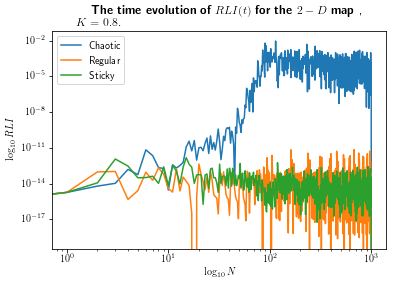

In [15]:
i = 0
for idx in range(len(x1_vals)):
    #intial conditions 
    x1[0] =x1_vals[idx]#0.01
    x2[0] = x2_vals[idx]#0.01
    dx1[0] = 1
    dx2[0] = 1

    y1[0] =x1[0] + 10e-14#0.01
    y2[0] = x2[0] + 10e-14#0.01
    dy1[0] = 1+1e-14
    dy2[0] = 1+1e-14
    #renormalize the initial deviation vectors
    dx1[0] = dx1[0]/alpha(dx1[0], dx2[0])
    dx2[0] = dx2[0]/alpha(dx1[0], dx2[0])
    dy1[0] = dy1[0]/alpha(dy1[0], dy2[0])
    dy2[0] = dy2[0]/alpha(dy1[0], dy2[0])
    K =0.8#0.971635 #0.8
    for i in range(N-1):
        x1[i+1] = (x1[i] + x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i]))%1
        x2[i+1] = (x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i]))%1
    
        #handle the variational equations
        dx1[i+1] = ((1 + K*np.cos(2*np.pi*x1[i+1]))*dx1[i] + dx2[i])%1
        dx2[i+1] = (K*np.cos(2*np.pi*x1[i+1])*dx1[i] + dx2[i])%1
    
        #w = [dx1, dx2]
        #computations for the second variable y
    
        y1[i+1] = (y1[i] + y2[i] + (K/(2*np.pi))*np.sin(2*np.pi*y1[i]))%1
        y2[i+1] = (y2[i] + (K/(2*np.pi))*np.sin(2*np.pi*y1[i]))%1
    
        #handle the variational equations
        dy1[i+1] = ((1 + K*np.cos(2*np.pi*y1[i+1]))*dy1[i] + dy2[i])%1
        dy2[i+1] = (K*np.cos(2*np.pi*y1[i+1])*dy1[i] + dy2[i])%1
        #w_dw = [dy1 ,dy2]
        #handle the computations of the RLI
        for idx in range(i):
            if i ==0:
                vec1[idx] = np.log(alpha(dx1[idx], dx2[idx]))
                vec2[idx] = np.log(alpha(dy1[idx], dy2[idx]))
                RLI[i] = (1/h)*(np.sum(np.linalg.norm([vec2[idx] - vec1[idx]])))
            else:
                vec1[idx] = np.log(alpha(dx1[idx], dx2[idx]))
                vec2[idx] = np.log(alpha(dy1[idx], dy2[idx]))
            RLI[i] = (1/i*h)*np.sum(np.linalg.norm([vec2[idx] - vec1[idx]]))
        #renormalize deviation vectors
        dx1[i+1] = dx1[i+1]/alpha(dx1[i+1], dx2[i+1])
        dx2[i+1] = dx2[i+1]/alpha(dx1[i+1], dx2[i+1])
        dy1[i+1] = dy1[i+1]/alpha(dy1[i+1], dy2[i+1])
        dy2[i+1] = dy2[i+1]/alpha(dy1[i+1], dy2[i+1])
      
    plt.loglog(np.linspace(0, N, N),RLI)
    #plt.plot(np.log10(np.linspace(0, N, N)), np.log10(RLI))
    plt.title(r'\textbf{The time evolution of $RLI(t)$ for the $2-D$ map },\\$K = 0.8$.')
    plt.xlabel(r'$\log_{10}N$')
    plt.ylabel(r'$\log_{10}RLI$')
    plt.legend(['Chaotic', 'Regular', 'Sticky'])
  
    
    

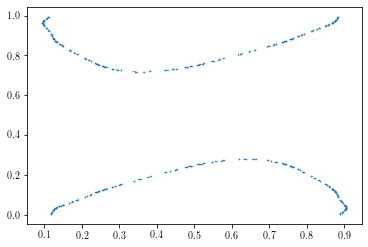

In [9]:
plt.scatter(x1, x2, s=0.1)

Text(0, 0.5, '$\\log_{10}RLI$')

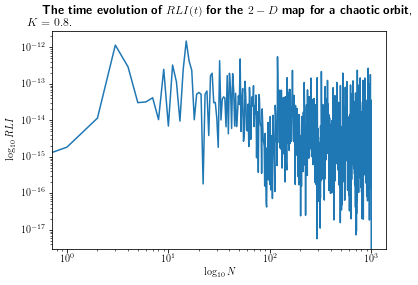

In [10]:

plt.loglog(np.linspace(0, N, N),RLI)
#plt.plot(np.log10(np.linspace(0, N, N)), np.log10(RLI))
plt.title(r'\textbf{The time evolution of $RLI(t)$ for the $2-D$ map for a chaotic orbit},\\$K = 0.8$.')
plt.xlabel(r'$\log_{10}N$')
plt.ylabel(r'$\log_{10}RLI$')


In [11]:
end_time = time.time() - start_time 
end_time/60

1.1833615978558858